In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import tensorflow as tf

try:
    import cPickle as pickle
except:
    import pickle

from IPython.display import display, display_html

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
#with pd.option_context('display.float_format', '{:}'.format):

%load_ext autoreload
%autoreload 2

In [2]:
##########
# 폰트설정 #
##########
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list.sort()
font_list = filter(lambda x: True if ".ttf" in x else False, font_list)
for x in font_list:
    print(x)

/Library/Fonts/Arial Unicode.ttf
/Library/Fonts/segoeuillight.ttf
/Library/Fonts/segoeuiregular.ttf
/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf
/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf
/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf
/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf
/System/Library/Fonts/Apple Braille.ttf
/System/Library/Fonts/Apple Symbols.ttf
/System/Library/Fonts/Keyboard.ttf
/System/Library/Fonts/NewYork.ttf
/System/Library/Fonts/NewYorkItalic.ttf
/System/Library/Fonts/SFCompactDisplay.ttf
/System/Library/Fonts/SFCompactRounded.ttf
/System/Library/Fonts/SFCompactText.ttf
/System/Library/Fonts/SFCompactTextItalic.ttf
/System/Library/Fonts/SFNS.ttf
/System/Library/Fonts/SFNSItalic.ttf
/System/Library/Fonts/SFNSMono.ttf
/System/Library/Fonts/SFNSMonoItalic.ttf
/System/Library/Fonts/SFNSRounded.ttf
/System/Library/Fonts/Supplemental/Andale Mono.ttf
/System/Library/Fonts/Supplemental/Apple Chancery.ttf
/System/Library/Fonts/Supplemental

In [3]:
KoreanFont = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf')
plt.rcParams['font.family'] = KoreanFont.get_name()
plt.rcParams['font.size'] = 12

In [4]:
##########
# 랜덤고정 #
##########
랜덤시드=0

import random
random.seed(랜덤시드)
np.random.seed(랜덤시드)

In [5]:
##########
# 변수정의 #
##########
데이터경로 = '../data/'

---
## 데이터 기초 분석

In [6]:
creditcard = pd.read_csv(데이터경로 + 'creditcard.csv')
display(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 1. 기초 기술통계
가장 처음으로 살펴볼 수 있는 부분. 
* V1~V28 컬럼 : 데이터 제공사에서 PCA등의 기법을 사용해 한 번 전처리를 거쳐 민감한 정보를 알 수 없게 변형하여 제공하는 데이터
* Time 컬럼   : 0 데이터가 발생한 시각을 기준으로 몇 초 후에 발생한 거래인지를 기록
* Amount 컬럼 : 거래 금액(달러)

In [7]:
#with pd.option_context('display.float_format', '{:.4f}'.format):
display(creditcard.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 데이터 분포도
#### 타겟 클래스 (사기여부)

In [8]:
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
creditcard.Class.value_counts()[1] / len(creditcard)

0.001727485630620034

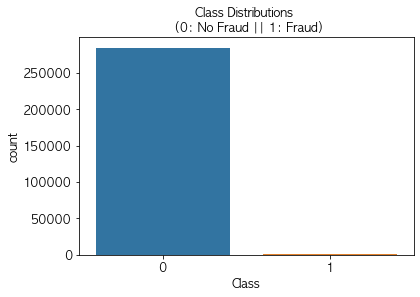

In [14]:
sns.countplot('Class', data=creditcard)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)
plt.show()

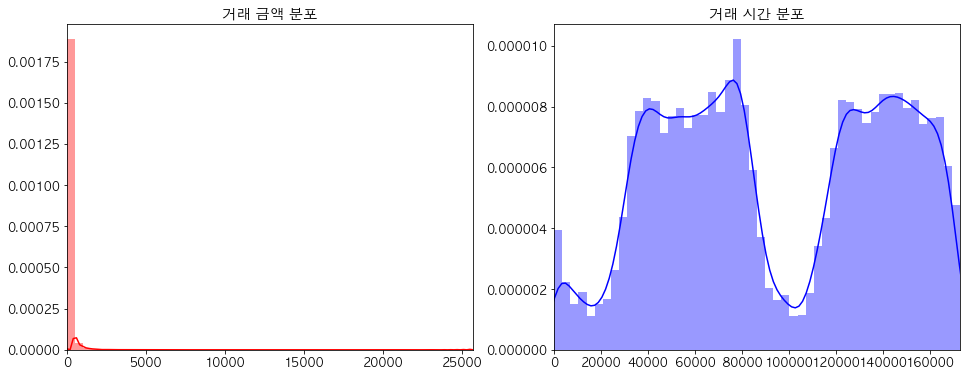

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

v_amt = creditcard['Amount'].values
v_time = creditcard['Time'].values

sns.distplot(v_amt, ax=ax[0], color='r')
ax[0].set_title('거래 금액 분포')
ax[0].set_xlim([min(v_amt), max(v_amt)])

sns.distplot(v_time, ax=ax[1], color='b')
ax[1].set_title('거래 시간 분포')
ax[1].set_xlim([min(v_time), max(v_time)])

plt.show()

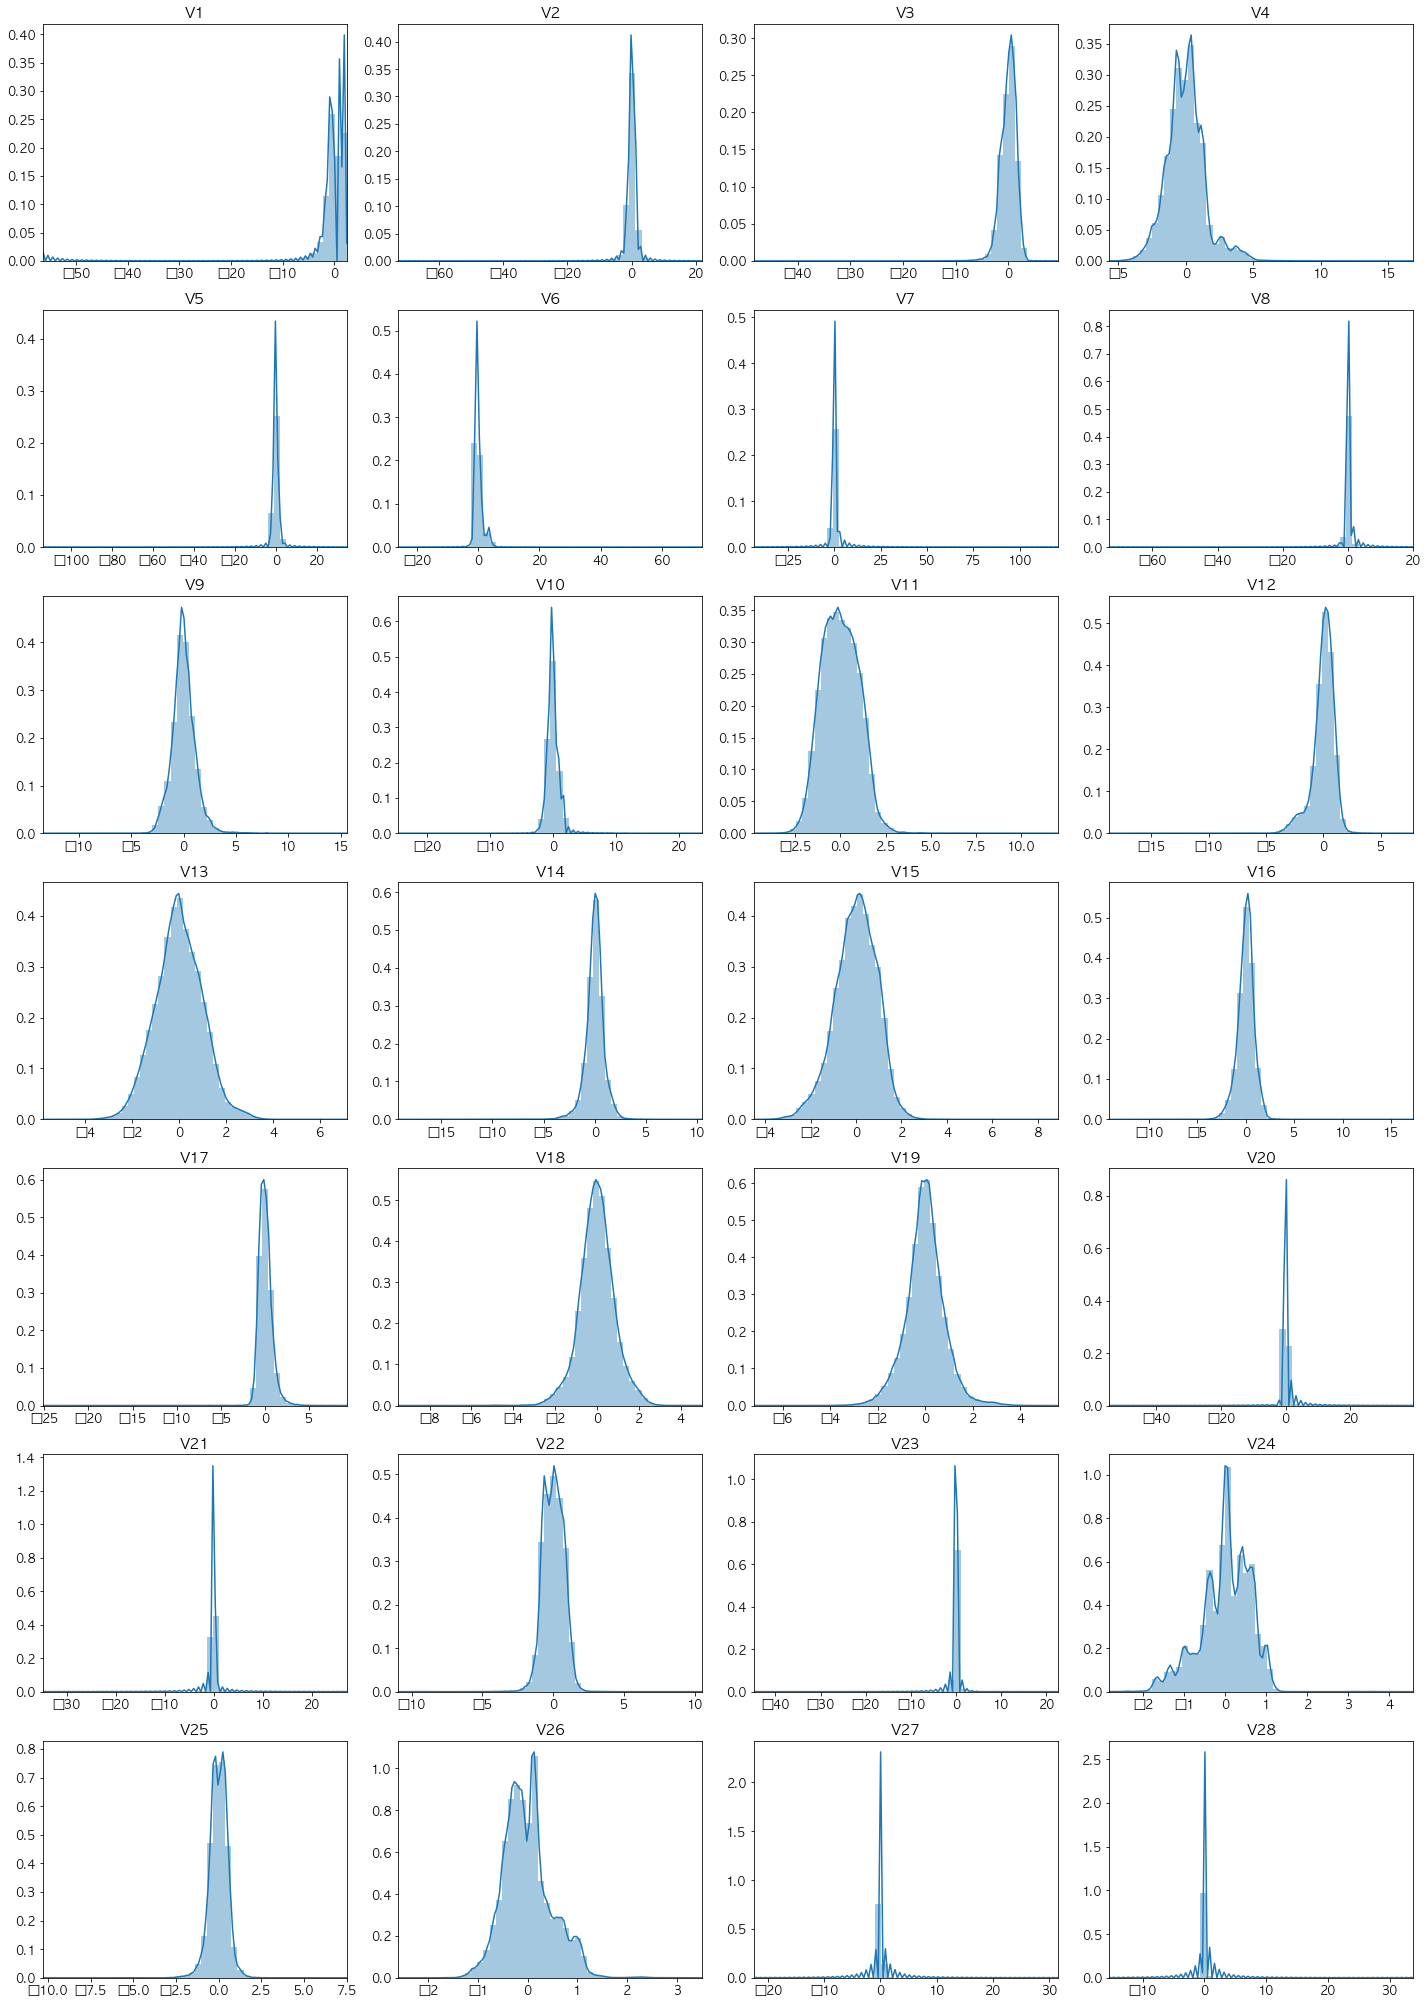

In [30]:
#V1 ~ V28

fig, ax = plt.subplots(7, 4, figsize=(20, 28))

for i in range(28):
    val = creditcard['V%d' % (i+1)].values
    
    sns.distplot(val, ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title('V%d' % (i+1))
    ax[i//4, i%4].set_xlim([min(val), max(val)])

#fig.suptitle("V1~V28 PCA features")
fig.tight_layout()
plt.show()

분포도를 통해 데이터가 어떻게 쏠려있는지 어떤 전처리가 필요한지 파악할 수 있다.

---
## 2. 데이터 전처리
V1~V28 변수들은 데이터 제공사 측에서 미리 전처리를 해 좋았지만, 전처리가 안 된 컬럼인 Amount와 Time도 전처리를 해야한다.

또한 극단적으로 불균형한 Fraud 데이터(전체 데이터의 0.0017%)로 인해 분석단계에서 상관관계를 잘못 파악하거나 예측모형을 만들 때 오버피팅 될 위험이 있기 때문에, 제대로 된 학습을 위해 언더샘플링을 통해 Fraud:Non-Fraud 비율이 1:1인 새 데이터 셋을 만들어야 한다.

### 2-1. Amount와 Time 컬럼 스케일링

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://t1.daumcdn.net/cfile/tistory/991BAB475B70228809")

In [17]:
from sklearn.preprocessing import RobustScaler #StandardScaler
# Robust Scaler : mean 대신 median을 기준으로 센터링, IQR 바탕으로 min, max를 잡아줌

rob_scaler = RobustScaler()

creditcard['Amount'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
creditcard['Time'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1, 1))
creditcard.columns = ['scaled_time', *creditcard.columns[1:-2], 'scaled_amount', 'Class']
#creditcard.drop(['Time', 'Amount'], axis=1, inplace=True)


In [18]:
creditcard

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


### 2-2. 학습 / 테스트 데이터 나누기

학습 데이터를 생성할 때에는 언더샘플링/오버샘플링을 수행하여 비율을 조정해야 하지만,

테스트 데이터는 반드시 원본비율을 유지해야 제대로 테스트를 했다고 할 수 있다.

In [21]:
from sklearn.model_selection import StratifiedKFold

print('정상건 ', round(creditcard['Class'].value_counts()[0]/len(creditcard) * 100,2), '% of the dataset')
print('사기건 ', round(creditcard['Class'].value_counts()[1]/len(creditcard) * 100,2), '% of the dataset')

정상건  99.83 % of the dataset
사기건  0.17 % of the dataset


In [83]:
X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

skf = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("train index: ", len(train_index), "test index: ", len(test_index))
    
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

train index:  227845 test index:  56962
train index:  227845 test index:  56962
train index:  227846 test index:  56961
train index:  227846 test index:  56961
train index:  227846 test index:  56961
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Stratified Fold : 원본과 대상 데이터의 비율이 동일하도록 데이터를 나눔

현재 커널에선 이 부분은 사용되지 않음. 아래에서 실제 학습할 때는 train_test_split을 사용하여 데이터를 나눠줌.

(작가의말) 가끔 학습시에 모델이 특정 split에 오버피팅 되는 경우가 있기 때문에, 데이터 split을 n번 수행하여 다양한 경우에도 비슷한 성능을 낸다는 것을 확인할 필요가 있습니다.

### 2-3. 랜덤 언더 샘플링

The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [22]:
랜덤데이터 = creditcard.sample(frac=1, random_state=랜덤시드)

사기데이터 = 랜덤데이터.loc[랜덤데이터['Class'] == 1]
정상샘플링데이터 = 랜덤데이터.loc[랜덤데이터['Class'] == 0][:492]

샘플링데이터 = pd.concat([사기데이터, 정상샘플링데이터])
샘플링데이터 = 샘플링데이터.sample(frac=1, random_state=랜덤시드)

샘플링데이터.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
74794,-0.339901,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,-0.049233,-0.153131,-0.814310,-1.894796,-0.831483,1.387289,1.188907,0.536817,-0.051403,-1.231386,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,4.051003,1
264755,0.903324,0.285994,-3.500172,0.120214,2.870073,-2.219233,1.735747,-0.809120,0.517737,1.304203,0.572238,-0.843588,-0.095421,-1.652901,-0.781826,-2.591612,1.292730,-0.278208,0.348355,-0.443393,1.347581,0.495849,-0.060820,-0.444735,-0.340144,-1.153573,2.258126,-0.248557,0.067937,10.995319,0
223572,0.690116,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,-5.653638,3.942316,-5.883724,-1.347814,-9.266120,-2.459556,-2.205644,-5.709087,-1.113937,-1.556530,0.164288,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,-0.293440,1
119634,-0.107685,0.364647,-1.868803,0.195291,0.395567,-1.140283,0.370634,-0.015770,-0.027628,1.157162,-0.683766,-1.618061,0.478853,0.640767,-0.588908,-0.213943,0.216853,-0.230232,-0.263339,0.690443,0.948612,-0.007493,-0.815611,-0.467571,-0.500501,0.109927,0.952522,-0.122180,0.087820,6.451338,0
82678,-0.295950,1.277862,-1.218097,0.436517,-1.443919,-0.943716,0.816429,-1.234908,0.338397,-1.845883,1.249644,0.727192,-0.541243,0.093744,-0.108782,1.664313,-1.748267,1.848211,-2.056222,-1.922357,-0.460539,-0.066430,0.302245,0.191320,-0.666031,0.013571,-0.098652,0.096963,0.011778,0.111786,0


In [42]:
샘플링데이터.to_pickle(데이터경로 + '샘플링데이터.pkl')

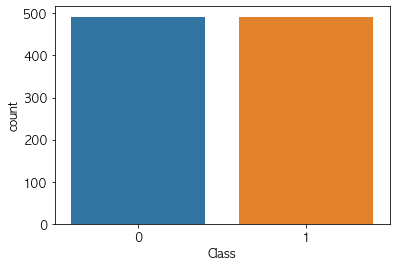

In [23]:
sns.countplot('Class', data=샘플링데이터)

## 3. 데이터 분석
### 3-1. Correlation Matrix

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


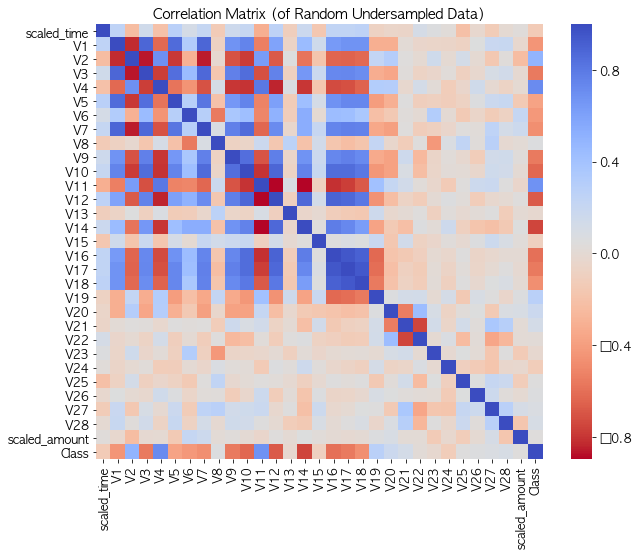

In [24]:
샘플링데이터_corr = 샘플링데이터.corr()
fig = plt.figure(figsize=(10, 8))
fig = sns.heatmap(샘플링데이터_corr, cmap='coolwarm_r', annot_kws={'size':20})
fig.set_title('Correlation Matrix (of Random Undersampled Data)', fontsize=14)
plt.show()

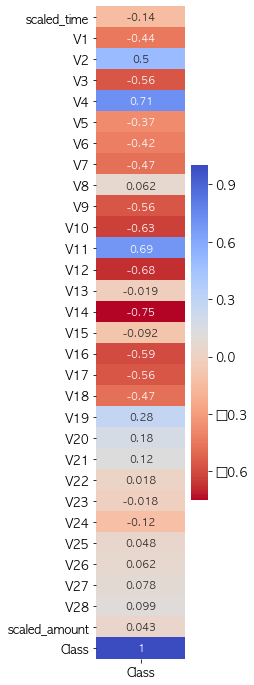

In [39]:
fig = plt.figure(figsize=(2, 12))
sns.heatmap(샘플링데이터_corr.loc[:, ['Class']], cmap='coolwarm_r', annot_kws={'size':10}, annot=True)

In [43]:
상관관계_양 = ['V2', 'V4', 'V11', 'V19']
상관관계_음 = ['V1', 'V3', 'V5', 'V6',
            'V7', 'V9', 'V10', 'V12',
            'V14', 'V16', 'V17', 'V18']

sns.boxplot은 자동으로 IQR에 속하지 않는 데이터를 outlier로 인식

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


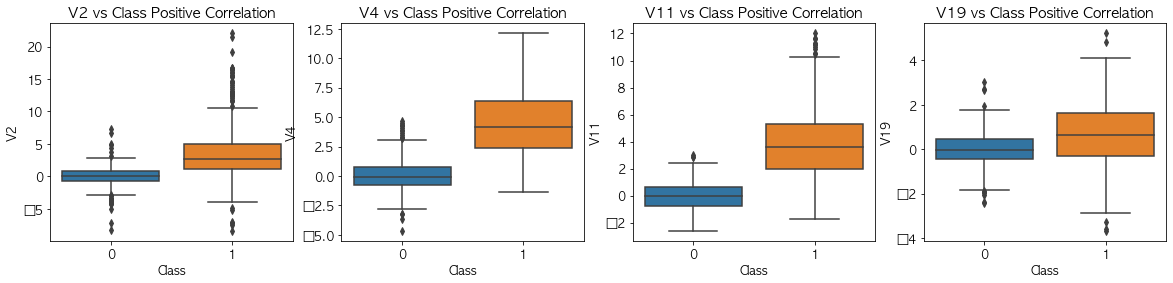

In [44]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

for i, v in enumerate(상관관계_양):
    sns.boxplot(x="Class", y=v, data=샘플링데이터, ax=axes[i])
    axes[i].set_title('%s vs Class Positive Correlation' % v)

plt.show()

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


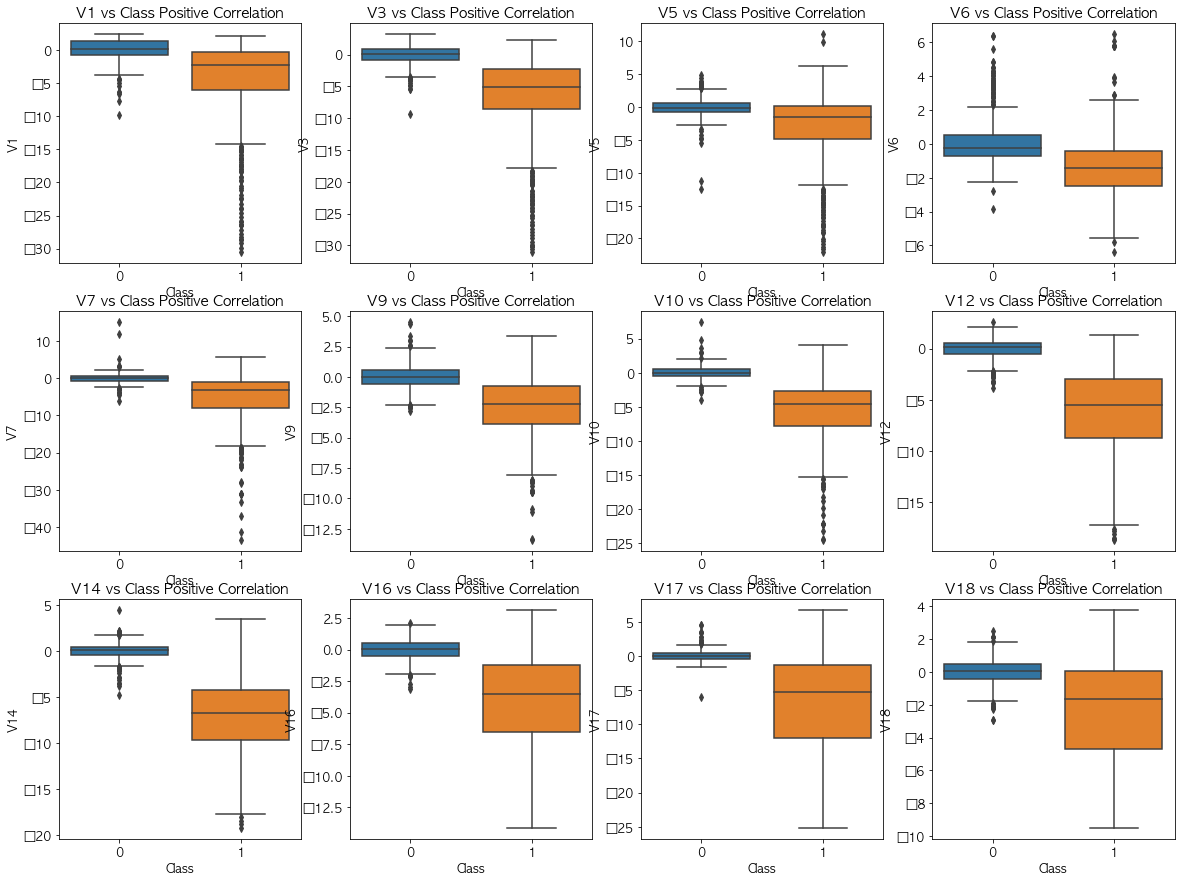

In [45]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, v in enumerate(상관관계_음):
    sns.boxplot(x="Class", y=v, data=샘플링데이터, ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title('%s vs Class Positive Correlation' % v)

plt.show()

In [46]:
상관관계_음 = [x for x in 상관관계_음 if x not in ['V1', 'V5', 'V6', 'V7', 'V9', 'V18']]

모든 아웃라이어를 제거하는 것은 정보량 소실의 위험이 있으므로, extreme한 outlier만 제거한다 (이 kernel에서 extreme의 기준은 IQR 범위에서 IQR * 1.5 = IQR 극단값에서 IQR Range의 1.5배 넘게 초과하는 값이라고 정의 - 일반적 outlier의 정의라고 한다)

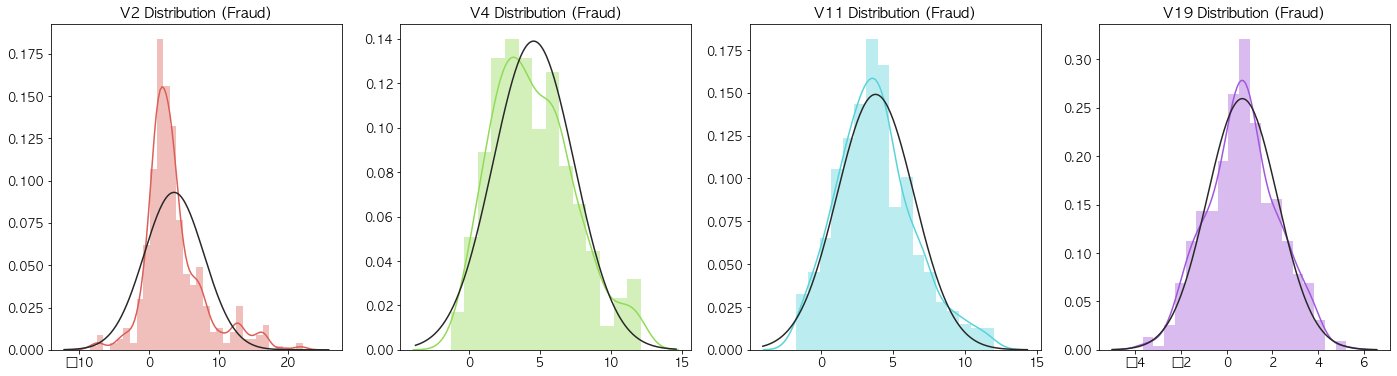

In [47]:
from scipy.stats import norm

height = 1
width = 4
f, axes = plt.subplots(height, width, figsize=(width * 6, height * 6))

cp = sns.color_palette("hls", len(상관관계_양))

for i, v in enumerate(상관관계_양):
    fraud_dist = 샘플링데이터[v].loc[샘플링데이터['Class'] == 1].values
    if height == 1:
        ax = axes[i]
    else:
        ax = axes[i//width, i%width]
    sns.distplot(fraud_dist, ax=ax, fit=norm, color=cp[i])
    ax.set_title('%s Distribution (Fraud)' % v)

plt.show()

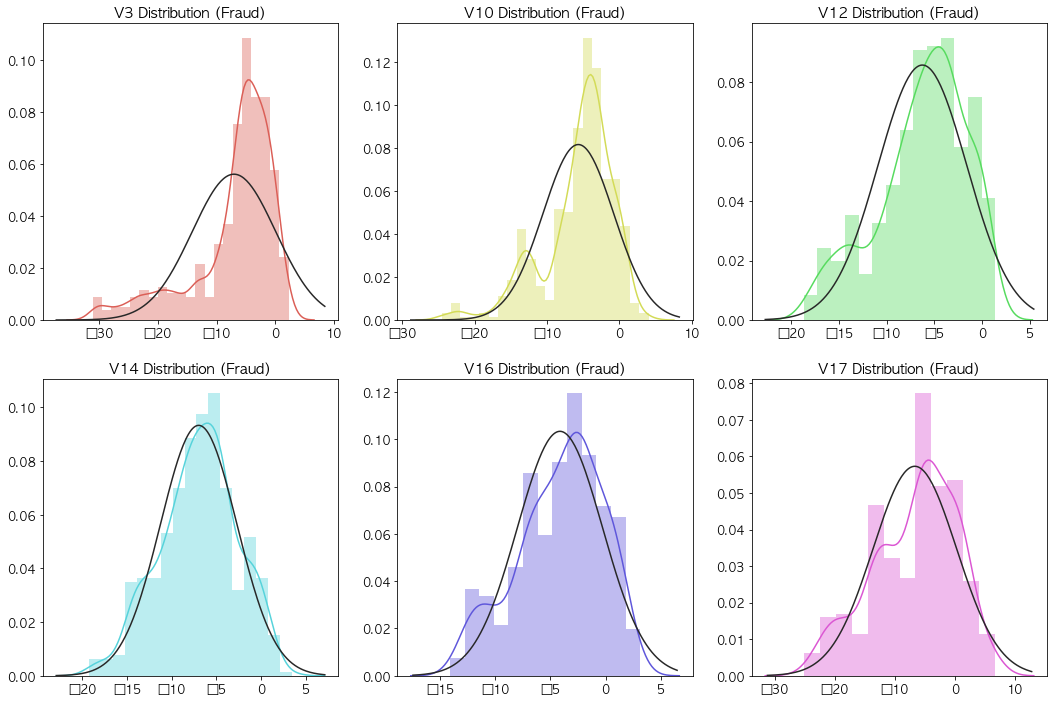

In [48]:
from scipy.stats import norm

height = 2
width = 3
f, axes = plt.subplots(height, width, figsize=(width * 6, height * 6))

cp = sns.color_palette("hls", len(상관관계_음))

for i, v in enumerate(상관관계_음):
    fraud_dist = 샘플링데이터[v].loc[샘플링데이터['Class'] == 1].values
    if height == 1:
        ax = axes[i]
    else:
        ax = axes[i//width, i%width]
    sns.distplot(fraud_dist, ax=ax, fit=norm, color=cp[i])
    ax.set_title('%s Distribution (Fraud)' % v)

plt.show()

In [49]:
print("아웃라이어 제거 전 데이터 개수 : ", len(샘플링데이터))
샘플링데이터_처리후 = None
for i, v in enumerate(상관관계_양 + 상관관계_음):
    fraud_data = 샘플링데이터[v].loc[샘플링데이터['Class'] == 1].values
    q25, q75 = np.percentile(fraud_data, 25), np.percentile(fraud_data, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    cut_off = iqr * 1.5 #tight
    lower_c, upper_c = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(v, lower_c))
    print('{} Upper: {}'.format(v, upper_c))
    
    outliers = 샘플링데이터[(샘플링데이터[v] > upper_c) | (샘플링데이터[v] < lower_c)]
    print('%s outliers : ' % v, outliers[v].values)
    if 샘플링데이터_처리후 is None:
        샘플링데이터_처리후 = 샘플링데이터.drop(outliers.index)
    else:
        샘플링데이터_처리후 = 샘플링데이터_처리후.drop(outliers.index, errors='ignore')
    print('%s 아웃라이어 제거 후 데이터 개수:  %d' % (v, len(샘플링데이터_처리후)))
    print('----' * 44)


아웃라이어 제거 전 데이터 개수 :  984
Quartile 25: 1.1882258198658224 | Quartile 75: 4.9712573249056025
iqr: 3.78303150503978
Cut Off: 5.67454725755967
V2 Lower: -4.486321437693848
V2 Upper: 10.645804582465273
V2 outliers :  [16.69783169 16.15570143 22.05772899 12.78597064 16.4974719  16.71338924
 12.93050512 -8.40215368 -5.1983602  14.70633467 16.4974719  14.60199804
 12.78597064 16.4974719  -5.06814307 -7.15904172 15.36580438 10.81966537
 13.48738579 -7.44901516 12.78597064 -7.16371356 11.81792199 12.78597064
 15.53613332 11.58638052 -6.97642001 11.61480054 12.86498856 13.20890428
 16.43452455 -7.19697963 12.78597064 12.37398914 12.35251867 15.59819266
 21.46720299 12.78597064 15.87692299 12.65219683 13.76594216 19.16723901
 -8.21312496 14.32325381 12.09589323 12.57211785 16.4974719  14.04456678
 -4.81446074]
V2 아웃라이어 제거 후 데이터 개수:  935
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
샘플링데이터_처리후.to_pickle('샘플링데이터_아웃라이어제거.pkl')

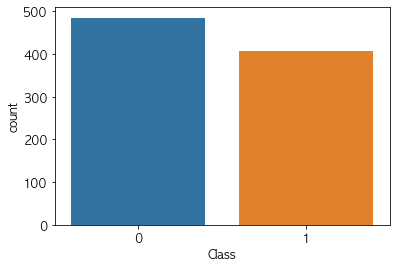

In [50]:
sns.countplot('Class', data=샘플링데이터_처리후)
plt.show()

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


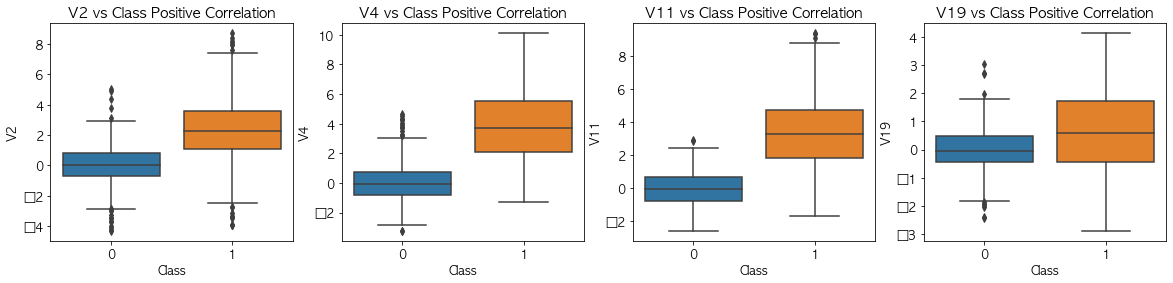

In [51]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

for i, v in enumerate(상관관계_양):
    sns.boxplot(x="Class", y=v, data=샘플링데이터_처리후, ax=axes[i])
    axes[i].set_title('%s vs Class Positive Correlation' % v)

plt.show()

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


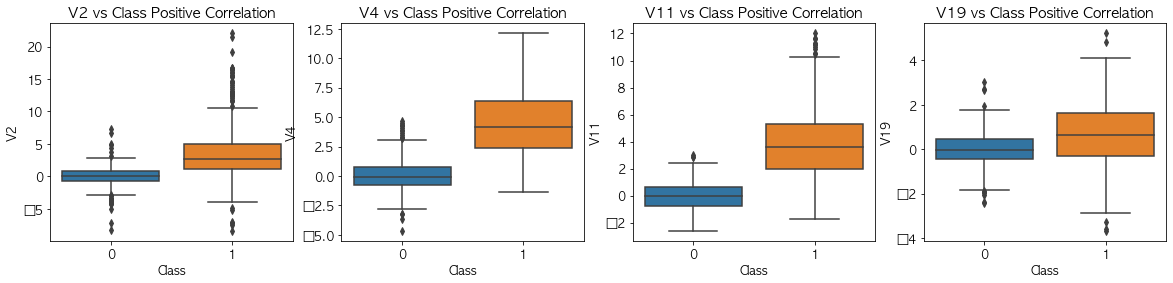

In [52]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

for i, v in enumerate(상관관계_양):
    sns.boxplot(x="Class", y=v, data=샘플링데이터, ax=axes[i])
    axes[i].set_title('%s vs Class Positive Correlation' % v)

plt.show()

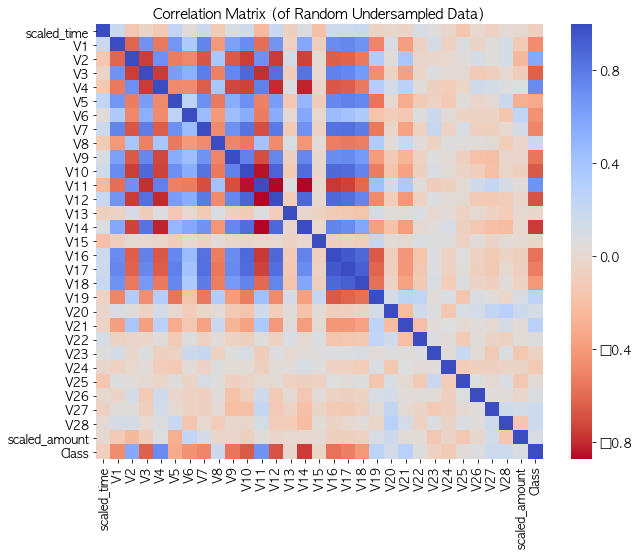

In [54]:
샘플링데이터_처리후_corr = 샘플링데이터_처리후.corr()
fig = plt.figure(figsize=(10, 8))
fig = sns.heatmap(샘플링데이터_처리후_corr, cmap='coolwarm_r', annot_kws={'size':12})
fig.set_title('Correlation Matrix (of Random Undersampled Data)', fontsize=14)
plt.show()

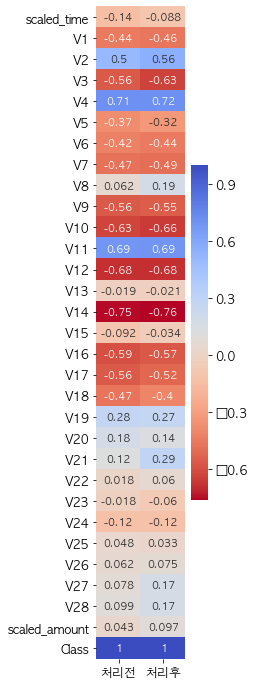

In [60]:
fig = plt.figure(figsize=(2, 12))
처리전_처리후_비교 = pd.concat([샘플링데이터_corr.loc[:, ['Class']], 샘플링데이터_처리후_corr.loc[:, ['Class']]], axis=1)
처리전_처리후_비교.columns = ['처리전', '처리후']
sns.heatmap(처리전_처리후_비교, cmap='coolwarm_r', annot_kws={'size':10}, annot=True)

아웃라이어 제거가 늘 정답은 아니다. 특히 Fraud Detection, Anomaly Detection 쪽에서는 일반 데이터와 비교하여 아웃라이어인 데이터를 이상 데이터라고 분류하는 식으로 예측하는 경우도 있기 때문에 신중하게 판단할 필요가 있다.

Kaggle의 커널 원작자의 말에 따르면 이 커널 같은 경우에는 아웃라이어를 제거하고/제거하지 않고 각각 모형을 만들어 비교해본 결과 아웃라이어를 제거한 쪽이 더 성능이 좋게 나왔다고 한다. 이 경우 아웃라이어가 사기거래 데이터에 대해 유의미한 정보를 담고 있는게 아닌, "진짜" 아웃라이어였다고 볼 수 있으므로 제거하고 진행했다고 한다.

## 차원 축소

In [87]:
### To-Do

In [61]:
X = 샘플링데이터_처리후.drop('Class', axis=1)
y = 샘플링데이터_처리후['Class']

In [64]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

In [65]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.0 s
PCA took 0.037 s
Truncated SVD took 0.0023 s


/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


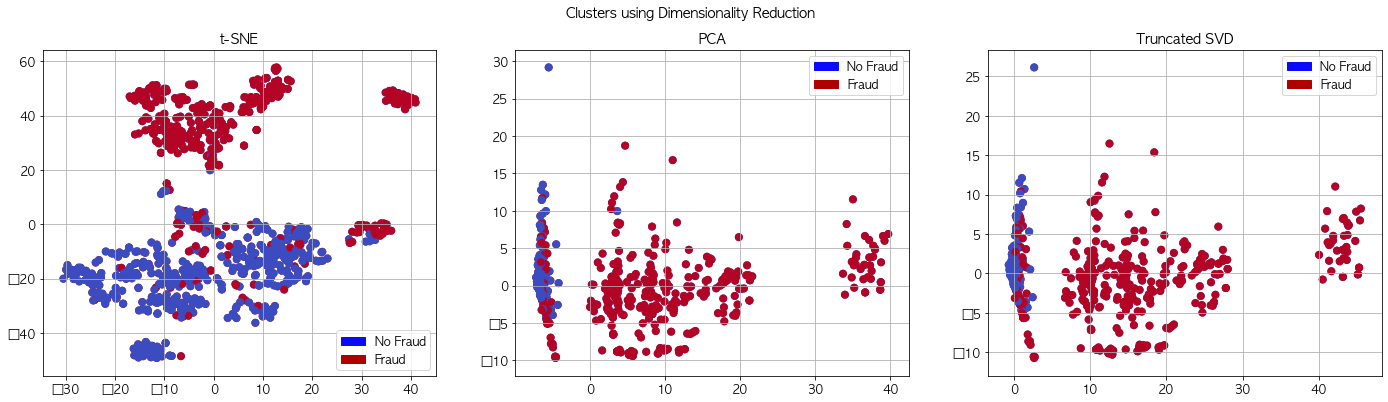

In [67]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

다양한 차원 축소 방법을 통해 그려본 분포도가 모두 꽤 명확하게 사기거래/정상거래를 분리해내는 걸로 보아서 모형을 만들었을 때 결과가 좋을 것이라고 예상할 수 있다.

## 3. Classifiers (UnderSampling)
본격적으로 예측모형을 만드는데, 우선 위에서 언더샘플링한 데이터를 사용하여 예측해본다.

In [68]:
from sklearn.model_selection import train_test_split

X = 샘플링데이터_처리후.drop('Class', axis=1)
y = 샘플링데이터_처리후['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=랜덤시드)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


In [70]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [102]:
from sklearn.model_selection import GridSearchCV, cross_val_score


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/

In [103]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.8%
Knears Neighbors Cross Validation Score 93.26%
Support Vector Classifier Cross Validation Score 94.38%
DecisionTree Classifier Cross Validation Score 92.42%


/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [104]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

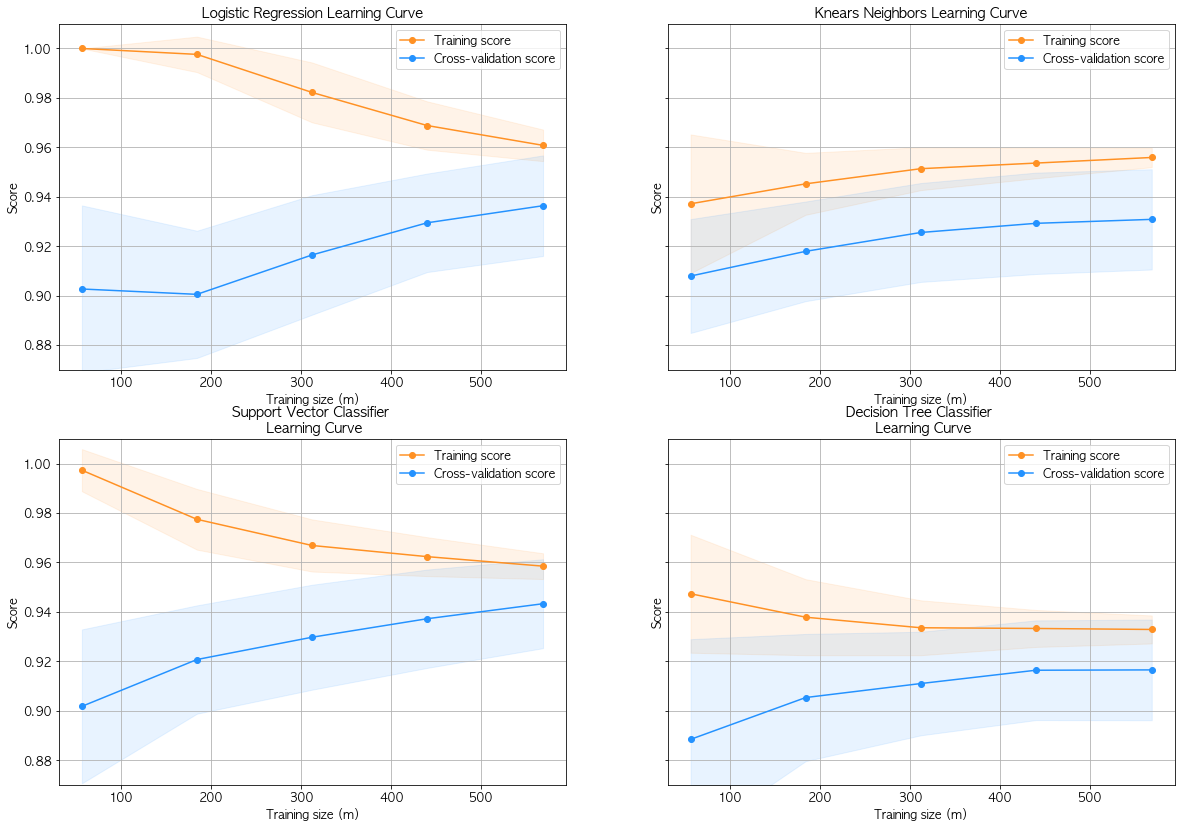

In [105]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=랜덤시드)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)


In [106]:
labels = ['No Fraud', 'Fraud']
log_reg_prediction = log_reg.predict(original_Xtest)
print(classification_report(original_ytest, log_reg_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     56863
       Fraud       0.04      0.92      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.94      0.53     56961
weighted avg       1.00      0.96      0.98     56961



In [110]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))


Logistic Regression:  0.9734220860070876
KNears Neighbors:  0.9266513424640042
Support Vector Classifier:  0.9760878587619322
Decision Tree Classifier:  0.9220700443763369


/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

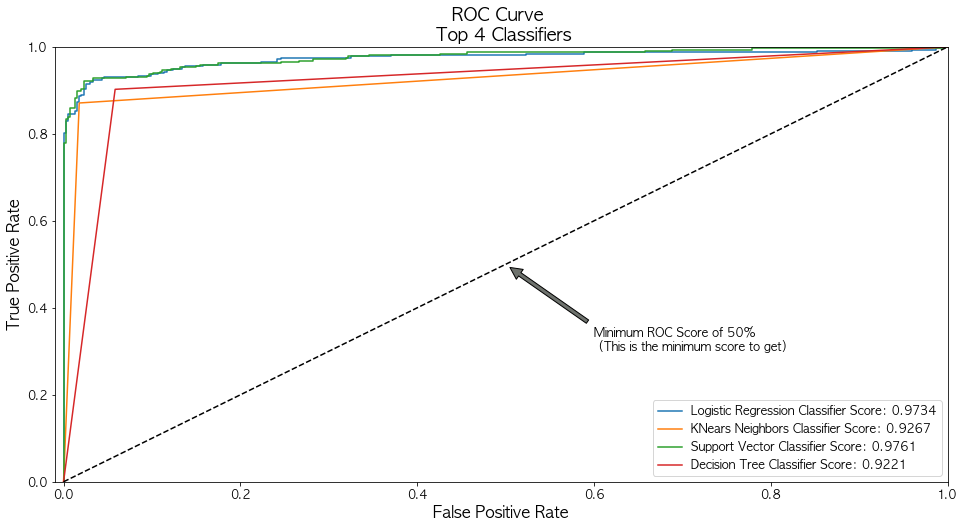

In [111]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


## 4. Classifier (OverSampling)
### SMOTE

In [152]:
Image(url= "https://datascienceschool.net/upfiles/e072f6e270884b2887051f2c10f433e7.png")

SMOTE (Synthetic Minority Over-sampling Technique)

https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/
    
불균형한 데이터의 오버 샘플링 방법

cross validation을 올바르게 하는법
 - 절대로 트레이닝 셋과 검증 셋의 데이터가 겹쳐선 안됨
 - OverSampling은 학습/검증셋 분리 후 학습셋에 대해서만 할것

In [84]:
original_Xtrain.shape

(227846, 30)

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [90]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [91]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in skf.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))


/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed

In [92]:
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9244090505482078
precision: 0.06303272119015589
recall: 0.9162934112301201
f1: 0.11622973547774318
---------------------------------------------------------------------------------------------------------------------------------------


In [93]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.85      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [114]:
y_score = best_est.decision_function(original_Xtest)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


average_precision_score : 여러 컷오프에서 precision 값의 평균

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

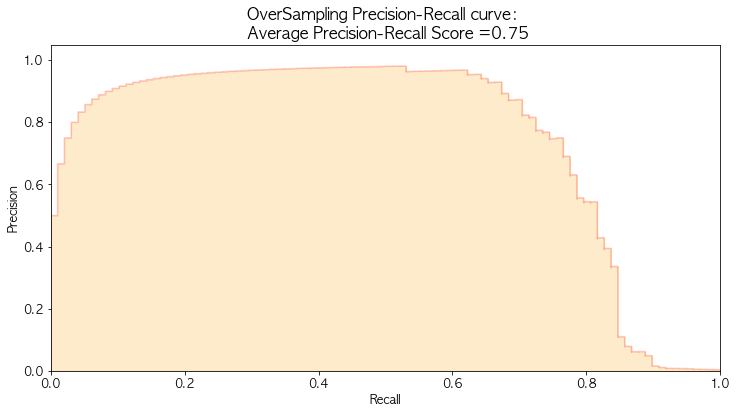

In [116]:
fig = plt.figure(figsize=(12,6))

from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

precision(정밀도) : 사기거래라고 판단한 건수 중 진짜 사기거래는 얼마인지 (낮을수록 잡은 건수대비 오탐 많음)

recall(재현율) : 전체 사기거래 중 몇 건의 사기거래를 잡아냈는지 (낮을수록 탐지하지 못한 사기거래가 많음)

In [118]:
sm = SMOTE(sampling_strategy='minority', random_state=랜덤시드)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [119]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :3.2870090007781982 sec


/Users/a60058221/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 결과 비교

In [120]:
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df


,Technique,Score
0,Random UnderSampling,0.938547
1,Oversampling (SMOTE),0.988044


[Text(0, 0.5, ''), Text(0, 1.5, '')]

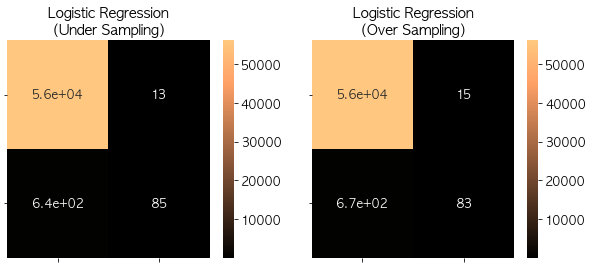

In [135]:
from sklearn.metrics import confusion_matrix

y_pred_all = log_reg.predict(original_Xtest)

rus_cm = confusion_matrix(original_ytest, y_pred_all).T
smote_cm = confusion_matrix(original_ytest, y_pred_sm).T

fig, ax = plt.subplots(1, 2,figsize=(10,4))

sns.heatmap(rus_cm, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression\n(Under Sampling)", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(smote_cm, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("Logistic Regression\n(Over Sampling)", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)



In [133]:
print(original_ytest.shape)
print(y_pred.shape)

(56961,)
(179,)


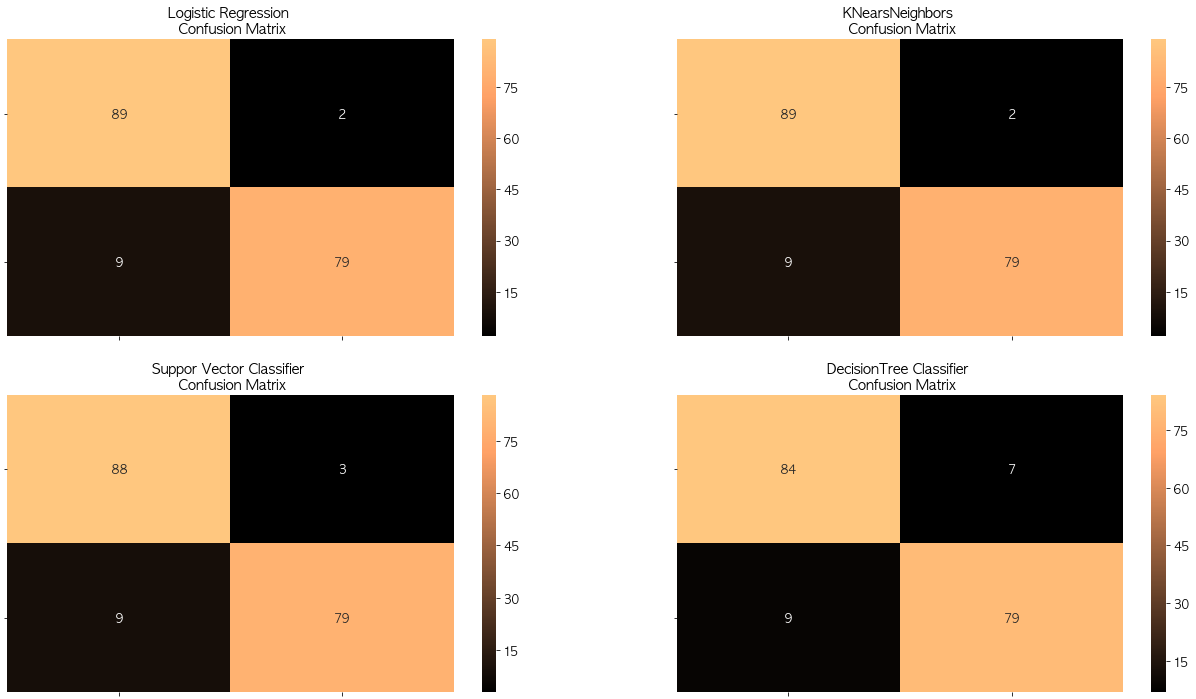

In [136]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()


## 5. Undersampling vs Oversampling (NN)

In [138]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


Using TensorFlow backend.


In [139]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [140]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [141]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 569 samples, validate on 143 samples
Epoch 1/20
 - 0s - loss: 0.4283 - accuracy: 0.8120 - val_loss: 0.3726 - val_accuracy: 0.8881
Epoch 2/20
 - 0s - loss: 0.2958 - accuracy: 0.8981 - val_loss: 0.3255 - val_accuracy: 0.9161
Epoch 3/20
 - 0s - loss: 0.2299 - accuracy: 0.9192 - val_loss: 0.3059 - val_accuracy: 0.9091
Epoch 4/20
 - 0s - loss: 0.1887 - accuracy: 0.9332 - val_loss: 0.3061 - val_accuracy: 0.9091
Epoch 5/20
 - 0s - loss: 0.1603 - accuracy: 0.9438 - val_loss: 0.3080 - val_accuracy: 0.9091
Epoch 6/20
 - 0s - loss: 0.1406 - accuracy: 0.9473 - val_loss: 0.3097 - val_accuracy: 0.9161
Epoch 7/20
 - 0s - loss: 0.1255 - accuracy: 0.9525 - val_loss: 0.3188 - val_accuracy: 0.9161
Epoch 8/20
 - 0s - loss: 0.1141 - accuracy: 0.9543 - val_loss: 0.3272 - val_accuracy: 0.9161
Epoch 9/20
 - 0s - loss: 0.1049 - accuracy: 0.9578 - val_loss: 0.3426 - val_accuracy: 0.9091
Epoch 10/20
 - 0s - loss: 0.0961 - accuracy: 0.9596 - val_loss: 0.3428 - val_accuracy: 0.9091
Epoch 11/20
 - 0s - los

In [143]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [144]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54914  1949]
 [    6    92]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


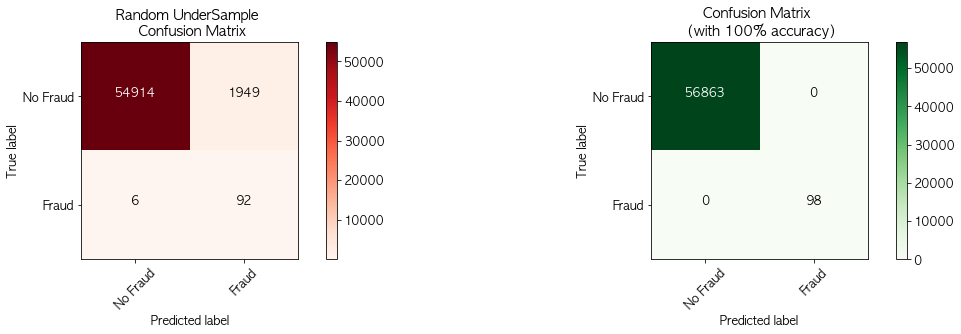

In [145]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Oversampling

In [147]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [148]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 1s - loss: 0.0581 - accuracy: 0.9790 - val_loss: 0.0250 - val_accuracy: 0.9966
Epoch 2/20
 - 1s - loss: 0.0128 - accuracy: 0.9973 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 3/20
 - 1s - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.0084 - val_accuracy: 0.9992
Epoch 4/20
 - 1s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/20
 - 1s - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9999
Epoch 6/20
 - 1s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9996
Epoch 7/20
 - 1s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/20
 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 9/20
 - 1s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 10/20
 - 1s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9998
Epoch 11/20
 - 2s 

In [149]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [150]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56848    15]
 [   25    73]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


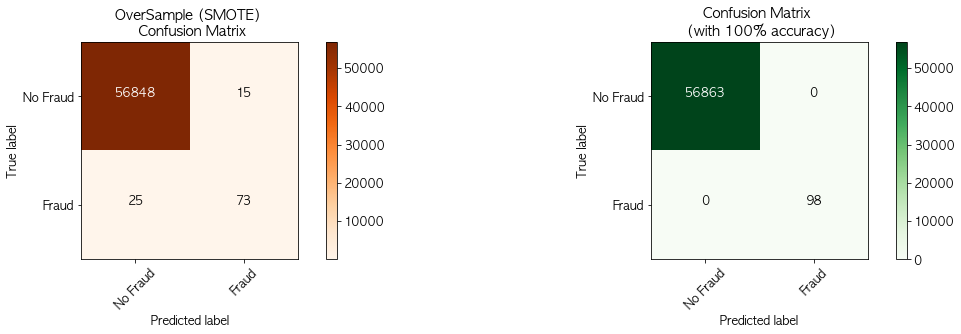

In [151]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

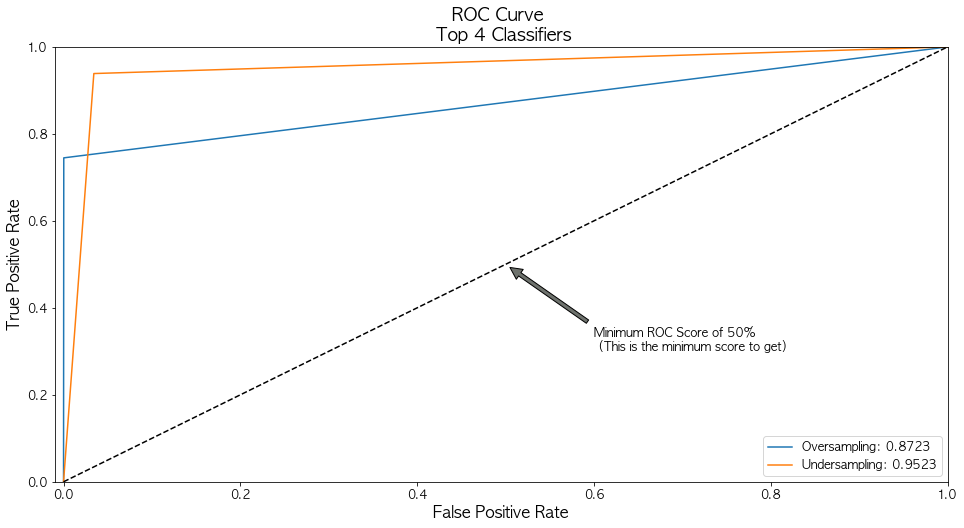

In [153]:
over_fpr, over_tpr, over_thresold = roc_curve(original_ytest, oversample_fraud_predictions)
under_fpr, under_tpr, under_threshold = roc_curve(original_ytest, undersample_fraud_predictions)

plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(over_fpr, over_tpr, label='Oversampling: {:.4f}'.format(roc_auc_score(original_ytest, oversample_fraud_predictions)))
plt.plot(under_fpr, under_tpr, label='Undersampling: {:.4f}'.format(roc_auc_score(original_ytest, undersample_fraud_predictions)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
            arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
plt.legend()
plt.show()

